# ASSESSING CUSTOMER RETENTION IN E-COMMERCE INDUSTRY

## BUSINESS UNDERSTANDING

##### OVERVIEW

Customer retention is a critical aspect of the e-commerce industry. In a highly competitive market, retaining existing customers is often more cost-effective than acquiring new ones. Companies need to understand customer behaviors, preferences, and buying patterns to minimize churn and foster loyalty. Customer retention analysis helps identify at-risk customers, improve marketing strategies, and enhance customer experience.

E-commerce businesses face several challenges related to customer retention:

- High Customer Churn Rates
- Lack of Insights
- Increasing Acquisition Costs
- Personalization Challenges
- Market Saturation



## DATA UNDERSTANDING

In [42]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Loading our dataset
Commerce_df =pd.read_csv('../Dataset/Dataset_ecommerce.csv')

In [44]:
# retrieving the first 5 rows
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [60]:
# columns for the dataset
Commerce_df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country'],
      dtype='object')

In [45]:
# size of the dataframe
Commerce_df.shape

(541909, 8)

In [46]:
# Information of the dataframe
Commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
# Checking missing values
Commerce_df.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [48]:
# Checking for duplicates
Commerce_df.duplicated().sum()

np.int64(0)

In [49]:
# Retrieving unique values for dataframe
for column in Commerce_df:
        print(f"Column Name : {column}")
        print(Commerce_df[column].unique())
        print("-----------------------------")

Column Name : InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']
-----------------------------
Column Name : InvoiceDate
['2010-12-01 08:26:00' '2010-12-01 08:28:00' '2010-12-01 08:34:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']
-----------------------------
Column Name : CustomerID
[17850. 13047. 12583. ... 13298. 14569. 12713.]
-----------------------------
Column Name : StockCode
['SC1734' 'SC2088' 'SC3463' ... 'SC2588' 'SC7252' 'SC5313']
-----------------------------
Column Name : Description
['Electronics' 'Furniture' 'Books' 'Toys' 'Kitchenware' 'Cosmetics'
 'Sports Equipment' 'Shoes' 'Cloths' 'Jewelry']
-----------------------------
Column Name : Quantity
[ 65  95  78  15  50  41  44  47  19  55  89  58   3   2  64  99  75  26
  69  56   7  10  62  23  42  43  91  45  92  30  71  84  39  88   6  54
  32  70  68  38  18  63  22  13  98  85  82  67  11  86  59  29   8  83
   4  31  34   5  61  36  87  94  90  52  73  57  74  97   9

In [50]:
# retrieve customer id  missing values and other values in variables
Commerce_df[Commerce_df['CustomerID'].isna()]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
622,536414,2010-12-01 11:52:00,NaN,SC7308,Kitchenware,93,62.55,Senegal
1443,536544,2010-12-01 14:32:00,NaN,SC3127,Toys,86,22.90,Burkina Faso
1444,536544,2010-12-01 14:32:00,NaN,SC3641,Kitchenware,7,72.45,Nigeria
1445,536544,2010-12-01 14:32:00,NaN,SC5252,Cosmetics,39,32.46,Ghana
1446,536544,2010-12-01 14:32:00,NaN,SC1375,Toys,39,3.12,South Africa
...,...,...,...,...,...,...,...,...
541536,581498,2011-12-09 10:26:00,NaN,SC9154,Toys,7,15.07,Libya
541537,581498,2011-12-09 10:26:00,NaN,SC8504,Cloths,35,43.48,Ethiopia
541538,581498,2011-12-09 10:26:00,NaN,SC5771,Electronics,82,88.05,Morocco
541539,581498,2011-12-09 10:26:00,NaN,SC7557,Kitchenware,75,91.56,Togo


In [51]:
# filling missing values with 'unknown'
Commerce_df['CustomerID'].fillna('Unknown', inplace=True)


/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_32924/2628745735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Commerce_df['CustomerID'].fillna('Unknown', inplace=True)
/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_32924/2628745735.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Commerce_df['CustomerID'].fillna('U

In [52]:
# checking missing values 
Commerce_df.isna().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [54]:
# converting invoice date to datetime datatype
Commerce_df['InvoiceDate'] = pd.to_datetime(Commerce_df['InvoiceDate']).dt.date

## EXPLORATORY DATA ANALYSIS

In [58]:
# Description statistics
Commerce_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,541909,305,2011-12-05,5331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,541909,4373,Unknown,135080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,9000,SC2014,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,541909,10,Sports Equipment,54765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,50.534748,28.849367,1.0,26.0,51.0,76.0,100.0
UnitPrice,541909.0,NaN,NaN,NaN,50.476354,28.564775,1.0,25.75,50.43,75.18,100.0
Country,541909,28,Cote d'Ivoire,19651,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## KEY INSIGHTS AND OBSERVATIONS

- I observed that the highest number of items were purchased on December 5th, 2011.

- I observed that sports equipment was the most frequently purchased category.

- I observed that the average unit price of items was $50.47, with prices ranging from $1 to $100.

- I observed that Côte d'Ivoire recorded the highest number of purchases among all countries.

- I observed that the average quantity purchased per transaction was 50.52 units.

#### UNIVARIATE ANALYSIS

In [61]:
# retrieving columns with numerical data types
num_cols=Commerce_df.select_dtypes(include='number')
num_cols.columns

Index(['Quantity', 'UnitPrice'], dtype='object')

In [70]:
# Dropping specified columns
Commerce_dff = Commerce_df.drop(columns=['InvoiceNo', 'InvoiceDate', 'CustomerID'])

# Retrieving columns with object data types
cat_cols = Commerce_dff.select_dtypes(include='object')

# Displaying the columns
print(cat_cols.columns)

Index(['StockCode', 'Description', 'Country'], dtype='object')


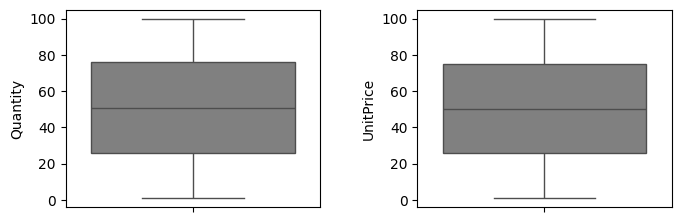

In [63]:

# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Commerce_df, y=Commerce_df[variable], color='gray')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

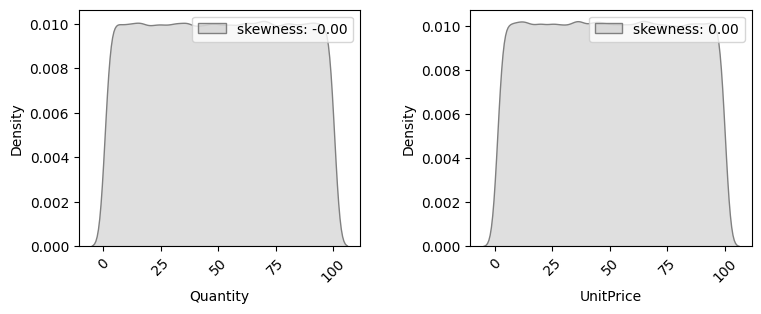

In [68]:
# Plot a Kernel density plot for the variables

plt.figure(figsize=(20, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Commerce_df,x=Commerce_df[variable],label= 'skewness: %.2f'%(Commerce_df[variable].skew()), fill = True,color= 'gray')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

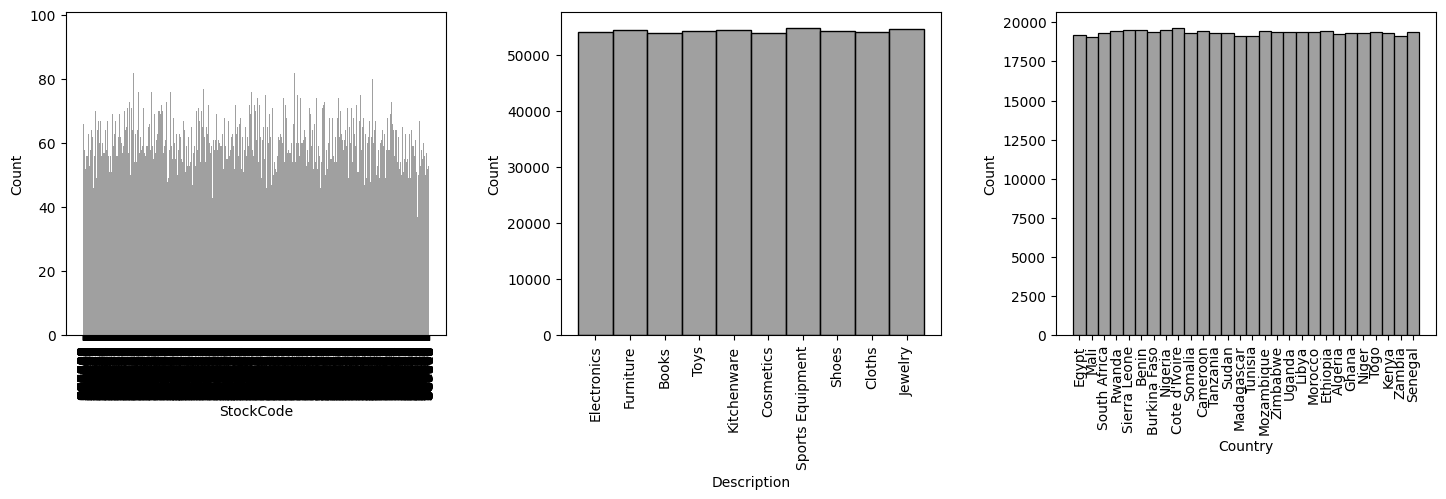

In [75]:
# Plot a histogram plot for the variables
plt.figure(figsize=(25, 30))

for i, variable in enumerate(cat_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(cat_cols,x=cat_cols[variable], color= 'gray')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

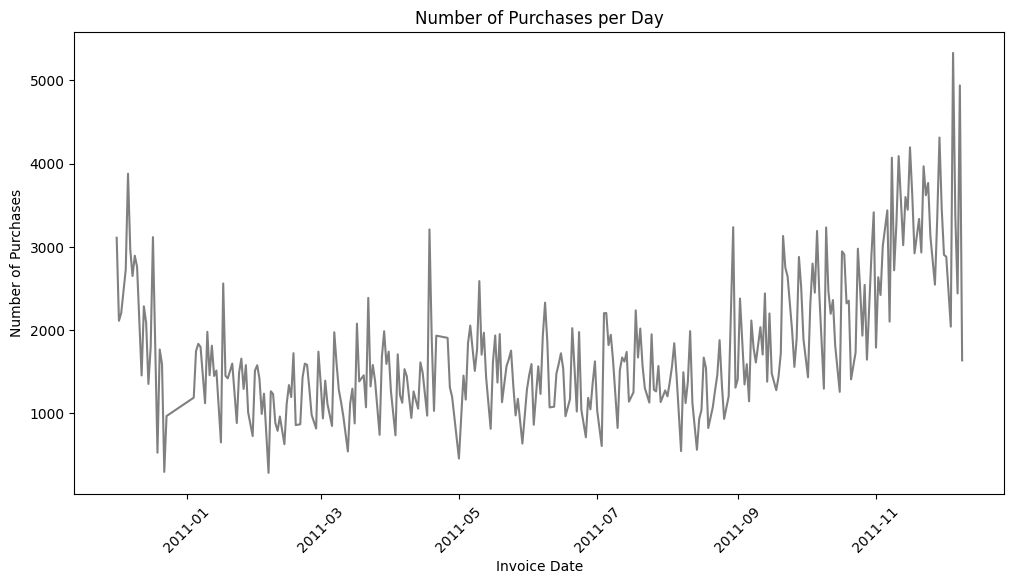

In [77]:
# Grouping by date to count purchases per day
daily_sales = Commerce_df.groupby('InvoiceDate').size()

# Plotting the time series
plt.figure(figsize=(12,6))
daily_sales.plot(color= 'gray')
plt.title('Number of Purchases per Day')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()